### <span style="color:#4f6da9">Че то</span> <span style="color:#0bb79a">про математику</span> 

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

def get_vars(name: str, n: int):
    """Генерит символьные переменные с одинаковым названием и индексами 0...(n-1)
    :param name: Название переменных (без учёта индекса)
    :param n: Количество переменных"""
    s = ""
    for i in range(n):
        s += f"{name}_{i} "
    return var(s, real=True)

# Гиперпараметры
M = Matrix([[1, 2, 1],
            [2, 0, 2],
            [1, 2, 1]])
print(f"Детерминант матрицы M: {M.det()}\nКвадратичная форма, образованная матрицей М:")

x = Matrix(get_vars(f"x", 3))
anw = x.T @ M @ x
anw.simplify()
anw.expand()

Детерминант матрицы M: 0
Квадратичная форма, образованная матрицей М:


Matrix([[x_0**2 + 4*x_0*x_1 + 2*x_0*x_2 + 4*x_1*x_2 + x_2**2]])

533/1000 = 53.3% имеет положительный детерминант


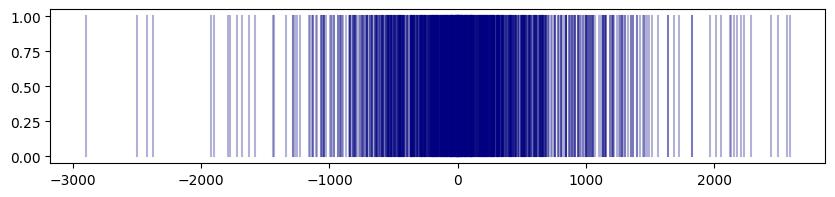

Матрица М с детерминантом 261: 
Matrix([[-3, -3, -4], [-3, -9, 3], [-4, 3, 1]])
Матрица М с детерминантом 1201: 
Matrix([[-2, -9, -5], [-9, -2, 6], [-5, 6, -7]])
Матрица М с детерминантом 195: 
Matrix([[-9, -8, 1], [-8, -9, 3], [1, 3, 9]])
Матрица М с детерминантом 278: 
Matrix([[9, -5, 4], [-5, -4, -1], [4, -1, -3]])


In [69]:
# Примеры симметричных положительно определённых матриц:
def get_symetric_matrix(value_range: int = 10):
    tmp = np.random.randint(-value_range, value_range, 6)
    return Matrix([[tmp[0], tmp[1], tmp[2]],
                   [tmp[1], tmp[3], tmp[4]],
                   [tmp[2], tmp[4], tmp[5]]])

n = 1000
count = 0
dets = []
plt.figure(figsize=(10,2))
for _ in range(n):
    M = get_symetric_matrix()
    plt.plot([M.det(), M.det()], [0, 1], c="navy", alpha=0.3)
    count += 1 if M.det() > 0 else 0
print(f"{count}/{n} = {round(100*count/n, 2)}% имеет положительный детерминант")
plt.show()
    
for _ in range(5):
    M = get_symetric_matrix()
    if M.det() > 0:
        print(f"Матрица М с детерминантом {M.det()}: \n{M}")

### <span style="color:#4f6da9">Ручной подбор</span> <span style="color:#0bb79a">пересечения графиков</span> 

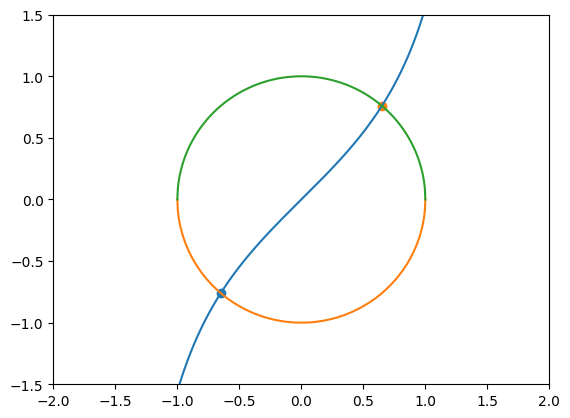

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def simple_search(func1, func2, *arg):
    """Поиск решения func1=func2 умным подбором"""
    bot, top, tol, topside = arg
    while (bot - top > tol):
        mid = (top + bot) / 2
        cond = (func1(mid) - func2(mid, topside)) * (func1(top) - func2(top, topside)) > 0
        top, bot = (mid, bot) if cond else (top, mid)
    return (top + bot) / 2

def func_circle(x: float, topside: bool):
    anw = np.sqrt(abs(1 - x*x))
    return anw * (2 * int(topside) - 1)

# Гиперпараметры
delta, N = (1e-4, 500)

# Поиск решений
anw = [simple_search(np.tan, func_circle, 0.75, -0.75, delta, bool(i)) for i in range(2)]

# Отрисовка
x = np.linspace(-1, 1, N)
plt.plot(x, [np.tan(x[i]) for i in range(N)])
for j in range(2):
    plt.plot(x, [func_circle(x[i], int(j)) for i in range(N)])
    plt.scatter (anw[j], np.tan(anw[j]))
plt.axis([-2, 2, -1.5, 1.5])
plt.show()

### <span style="color:#4f6da9">Че то по</span> <span style="color:#0bb79a">вкладам</span> 

In [2]:
import numpy as np

# Проценты в год
dy = 0.18  # 18%

# Денег на счёте
money = 380000  # рублей

# Месяцы
months = [1, 9, 12]

print(f"Прибыль в год: {round(100*dy, 5)}%")
dm = np.power(1 + dy, 1/12) - 1
print(f"Прибыль в месяц: {round(100*dm, 5)}%")
print(f"0 месяц: на вкладе {money} рублей ({round(money/1e3)} тысяч)")
for mm in months:
    money_ = money
    for i in range(mm):
        money_ *= (1 + dm)
    print(f"{mm} месяц: на вкладе {money_} рублей (+ {round((money_-money)/1e3)} тысяч) | Прибыль {round(100*money_/money - 100,2)}%")

Прибыль в год: 18.0%
Прибыль в месяц: 1.38884%
0 месяц: на вкладе 380000 рублей (380 тысяч)
1 месяц: на вкладе 385277.6035323958 рублей (+ 5 тысяч) | Прибыль 1.39%
9 месяц: на вкладе 430224.4639088511 рублей (+ 50 тысяч) | Прибыль 13.22%
12 месяц: на вкладе 448399.9999999993 рублей (+ 68 тысяч) | Прибыль 18.0%


### <span style="color:#4f6da9">Прикольные</span> <span style="color:#0bb79a">приколы</span> 

In [9]:
# Число Фиббоначи в 1 строку
print((lambda a: 0 if a==1 else (1 if a==2 else fib_func(a-1) + fib_func(a-2)))(int(input())))

 10


34


In [10]:
# Число Многобоначчи 
fib_func = lambda a: 0 if a<=1 else (1 if a==9 else sum([fib_func(a-i) for i in range(1, 9)]))
print(fib_func(int(input())))

 12


4


In [32]:
# Поиск уникальных числа
s = "1 2 10 5 10"
a = [int(i) for i in s.split()]
print([i for i in set(a) if a.count(i) == 1])

[1, 2, 5]


In [33]:
# Сортировка по алфавиту
a = set(["asd", "qwe", "zxc"])
sorted(list(a))

['asd', 'qwe', 'zxc']

In [32]:
s = "foo qwerty aabb qwerty foo".split()
a = [[s.count(i), i] for i in list(set(s))]
sorted(a, key=lambda i: str(10 - i[0]) + i[1])

[[2, 'foo'], [2, 'qwerty'], [1, 'aabb']]

In [1]:
[i for i in range(10) if i % 2 == 1]

[1, 3, 5, 7, 9]

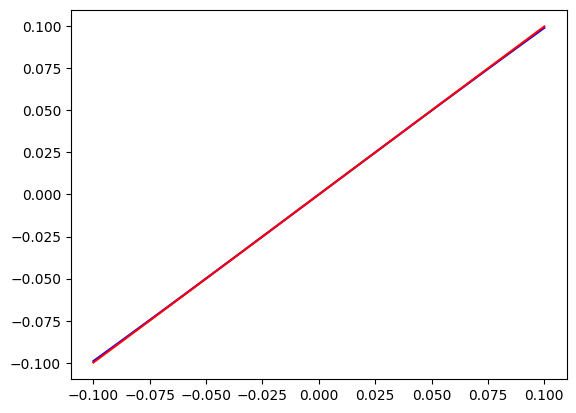

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def fact(n):
    res = 1
    for i in range(1, n + 1):
        res = res * i
    return res


def my_sin(x):
    anw = 0
    sign = 1
    for i in [i for i in range(10000) if i % 2 == 1]:
        anw += sign * x**i / fact(int(x))
        sign *= -1
    return anw

x = np.linspace(-0.1, 0.1, 100)
y = [my_sin(i) for i in x]
y2 = [np.sin(i) for i in x]
plt.plot(x, y, c='b', label="Наш синус")
plt.plot(x, y2, c='r', label="Синус")
plt.show()

### <span style="color:#4f6da9">Неинтегрируемый</span> <span style="color:#0bb79a">интеграл</span> 

In [68]:
import sympy

xs, ys = sympy.var('x y')

eqs = sympy.Eq(ys, sympy.sin(1 / xs))
print(f"Функция:")
display(eqs)
print(f"Производная:")
display(eqs.rhs.diff(xs))
print(f"Интеграл от производной:")
display(sympy.integrate(eqs.rhs.diff(xs), xs))

eqs = sympy.Eq(ys, sympy.exp(1 / xs))
print(f"Функция:")
display(eqs)
print(f"Производная:")
display(eqs.rhs.diff(xs))

Функция:


Eq(y, sin(1/x))

Производная:


-cos(1/x)/x**2

Интеграл от производной:


sin(1/x)

Функция:


Eq(y, exp(1/x))

Производная:


-exp(1/x)/x**2

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [80]:
a, b = -1, -0.01
xn = np.linspace(a, b, 1000)

def func(x): return np.sin(1/x)
def d_func(t, y): return -np.cos(1/t)/t**2

In [77]:
a, b = 0.4, 1
xn = np.linspace(a, b, 10000)

def func(x): return np.exp(1/x)
def d_func(t, y): return -np.exp(1/t) * t**2

Функция:


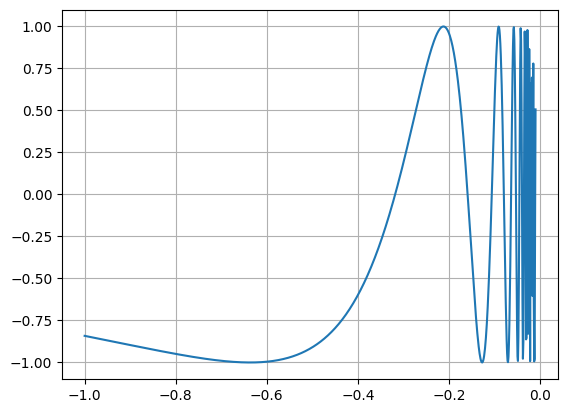

Функция, восстановленная по производной:


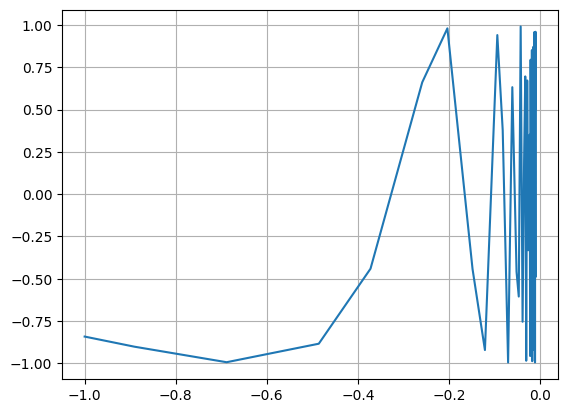

Функция, восстановленная по производной:


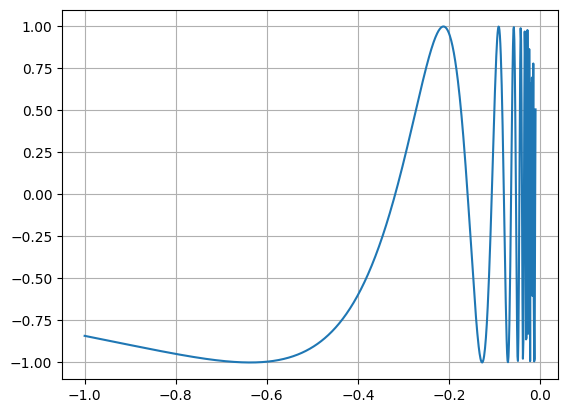

Функция, восстановленная вручную:


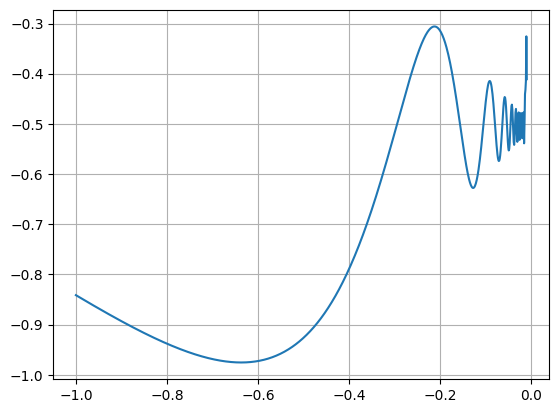

In [81]:
print(f"Функция:")
plt.plot(xn, func(xn))
plt.grid()
plt.show()

print(f"Функция, восстановленная по производной:")
sol = scipy.integrate.solve_ivp(d_func, [a, b], [func(a)])
plt.plot(sol.t, sol.y[0])
plt.grid()
plt.show()

anw = scipy.integrate.ode(d_func)
anw.set_initial_value(func(a), a)
y2 = [func(a)]
for i in range(len(xn) - 1):
    y2.append(anw.integrate(xn[i+1])[0])
print(f"Функция, восстановленная по производной:")
plt.plot(xn, y2)
plt.grid()
plt.show()

y = [func(a)]
h = (a - b) / len(xn)
for i in xn[1:]:
    y.append(y[-1] + d_func(i, y[-1]) * i * h)
print(f"Функция, восстановленная вручную:")
plt.plot(xn, y)
plt.grid()
plt.show()

### <span style="color:#4f6da9">Сходимость</span> <span style="color:#0bb79a">ряда</span> 

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

def s(n): return sum([1/i**2 for i in range(1, n+1)])

x = np.arange(1, 11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])